In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# mlQTLs: algorithm for QTLs mapping (and feature selection??)

I want to develop an ensemble L1norm approach for QTLs mapping, but it can be used also for feature selection on regression problems (maybe).

I took the idea (especially for classification tasks) from [this
manuscript](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5260053/)

### QTL mapping (main functionality)
You should use Rqtl for simulating crosses

In [2]:
#import rpy2
%load_ext rpy2.ipython

Create cell with R code

    Backcross

    No. individuals:    250 

    No. phenotypes:     1 
    Percent phenotyped: 100 

    No. chromosomes:    4 
        Autosomes:      1 2 3 4 

    Total markers:      148 
    No. markers:        41 36 45 26 
    Percent genotyped:  100 
    Genotypes (%):      AA:50.5  AB:49.5 


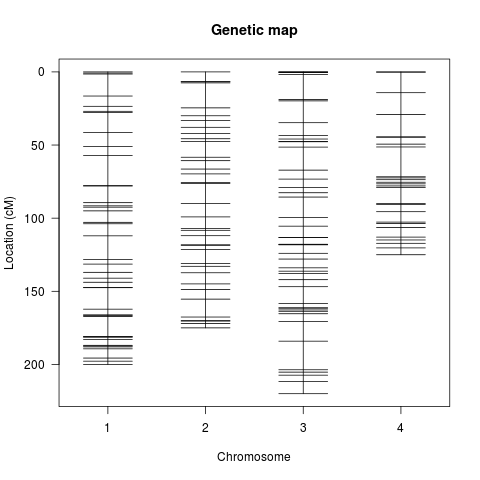

In [104]:
%%R
library(qtl)
L=c(200, 175, 220, 125)
set.seed(42)
mapD=sim.map(L, L/5+1, eq.spacing=F, include.x=F)
plot(mapD)
bc_model = rbind(c(2, 20, 1))
BC_cross = sim.cross(mapD, n.ind=250, type='bc', model = bc_model)
dim(RIL_cross$pheno)
summary(BC_cross)
#write.cross(BC_cross, format='csv', filestem='BC_dominant_cross')

## Test optimization on random datasets

In [4]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=50, n_features = 500, n_informative=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from mlQTLs import *

weigths, scores = mlQTLs_analysis(X_train, y_train)

In [28]:
score_f =scores/1000
sns.distplot(scores/1000)
plt.show()

In [29]:
sns.distplot(weigths)
plt.show()

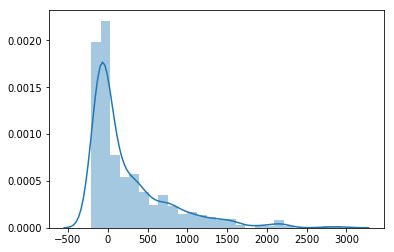

In [30]:
sns.distplot(score_f*weigths)
plt.show()

In [11]:
X_train.shape

(40, 500)

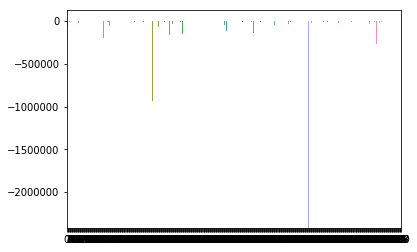

In [33]:
sns.barplot(list(range(500)), weigths/score_f)
plt.show()

In [67]:
sns.barplot(list(range(500)), scores*weigths)
plt.hlines(2140108.98839095, xmin=0, xmax=500 )
plt.show()

## QTL

In [2]:
cross = pd.read_csv('BC_dominant_cross.csv', sep=',', header=0, skiprows=[1,2])
cross.head()

phenotype D1M1 D1M2 D1M3 D1M4 D1M5 D1M6 D1M7 D1M8 D1M9  ...  D4M17 D4M18  \
0   1.269688    A    A    A    A    A    A    A    A    A  ...      A     A   
1  -1.406968    H    H    H    H    H    H    H    H    H  ...      A     A   
2   2.101463    H    H    H    H    H    H    H    H    H  ...      A     A   
3   2.193214    H    H    H    H    H    H    H    H    H  ...      A     A   
4   1.581403    H    H    H    H    H    H    H    H    H  ...      H     H   

  D4M19 D4M20 D4M21 D4M22 D4M23 D4M24 D4M25 D4M26  
0     A     A     A     A     A     A     A     A  
1     H     H     H     H     H     H     H     H  
2     A     A     A     H     H     H     H     H  
3     A     A     A     A     A     A     A     A  
4     H     H     H     H     H     H     H     H  

[5 rows x 149 columns]

In [3]:
# prepare Y and drop
y = cross['phenotype']
cross = cross.drop('phenotype', axis=1)
cross.head()

D1M1 D1M2 D1M3 D1M4 D1M5 D1M6 D1M7 D1M8 D1M9 D1M10  ...  D4M17 D4M18 D4M19  \
0    A    A    A    A    A    A    A    A    A     A  ...      A     A     A   
1    H    H    H    H    H    H    H    H    H     H  ...      A     A     H   
2    H    H    H    H    H    H    H    H    H     H  ...      A     A     A   
3    H    H    H    H    H    H    H    H    H     H  ...      A     A     A   
4    H    H    H    H    H    H    H    H    H     H  ...      H     H     H   

  D4M20 D4M21 D4M22 D4M23 D4M24 D4M25 D4M26  
0     A     A     A     A     A     A     A  
1     H     H     H     H     H     H     H  
2     A     A     H     H     H     H     H  
3     A     A     A     A     A     A     A  
4     H     H     H     H     H     H     H  

[5 rows x 148 columns]

In [4]:
#prepare_array
d = {'A':0, 'H':1}
# I want to try to convert the H axis to 2
#d = {'A':-1, 'H':1}
cross_numeric = cross.replace(to_replace=d)
cross_numeric.head()

D1M1  D1M2  D1M3  D1M4  D1M5  D1M6  D1M7  D1M8  D1M9  D1M10  ...    D4M17  \
0     0     0     0     0     0     0     0     0     0      0  ...        0   
1     1     1     1     1     1     1     1     1     1      1  ...        0   
2     1     1     1     1     1     1     1     1     1      1  ...        0   
3     1     1     1     1     1     1     1     1     1      1  ...        0   
4     1     1     1     1     1     1     1     1     1      1  ...        1   

   D4M18  D4M19  D4M20  D4M21  D4M22  D4M23  D4M24  D4M25  D4M26  
0      0      0      0      0      0      0      0      0      0  
1      0      1      1      1      1      1      1      1      1  
2      0      0      0      0      1      1      1      1      1  
3      0      0      0      0      0      0      0      0      0  
4      1      1      1      1      1      1      1      1      1  

[5 rows x 148 columns]

In [5]:
from sklearn.model_selection import train_test_split
X = cross_numeric.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [156]:
from mlQTLs import *
# modify function for returning the coeff_array and the scores
weigths, scores = mlQTLs_analysis(X, y)

In [162]:
scores

array([ 56, 120,  24, 961, 283, 856, 924, 946, 215, 648, 344, 421, 439,
       153,  69, 548, 392, 370, 545, 351, 533, 674, 344, 778, 780, 780,
       109, 310, 184, 424, 341, 325, 325, 921, 794, 568, 473, 706, 851,
       678, 633, 937, 708, 708, 802, 993, 915, 878, 913, 289, 525, 748,
       793, 875, 515, 226, 495, 570, 360, 518, 227, 494, 500, 602, 602,
       476, 538, 431, 857, 304,  85, 516, 574, 686, 686, 641, 273, 239,
       239, 518, 745, 367, 195, 597, 544, 522, 840, 582, 582, 505, 768,
       312, 460, 899, 376, 533, 616, 114, 280, 385, 385, 385, 608, 591,
       305, 859, 677, 636, 826, 366, 102, 102, 693, 760, 956, 324, 300,
        60, 131, 431,  59, 377, 765, 636,  62, 324, 477, 477, 447, 308,
       686, 341, 597, 867, 446, 193, 193, 935, 935, 879, 229, 207, 420,
        27, 176, 398, 572, 574])

In [163]:
sns.barplot(list(range(148)), weigths*scores)
#plt.hlines(2140108.98839095, xmin=0, xmax=500 )
plt.show()

In [164]:
np.percentile(weigths*scores, q=[50, 75, 90, 95, 99])

array([   1092.11781598,   14817.06040829,   56390.4485774 ,
         74559.97302527,  112592.55824234])

In [165]:
new_frame = pd.DataFrame({'markers_ID': cross_numeric.columns, 'Vals' :weigths*scores})
new_frame.head()

Vals markers_ID
0   -4471.146051       D1M1
1   -5337.657470       D1M2
2   -2327.606032       D1M3
3  117098.977724       D1M4
4  -18725.528874       D1M5

In [166]:
new_frame[new_frame['Vals']>= np.percentile(new_frame['Vals'], 99)]

Vals markers_ID
3   117098.977724       D1M4
45  159398.098274       D2M5

The QTLs in the simulation is located on Chr2 (D2) at 20cM.
Theres two markers (D2M5, D2M6), are acually the closest one being located at 24 and 29 cM in the map.
D2M4 is at 7 cM on Chr02


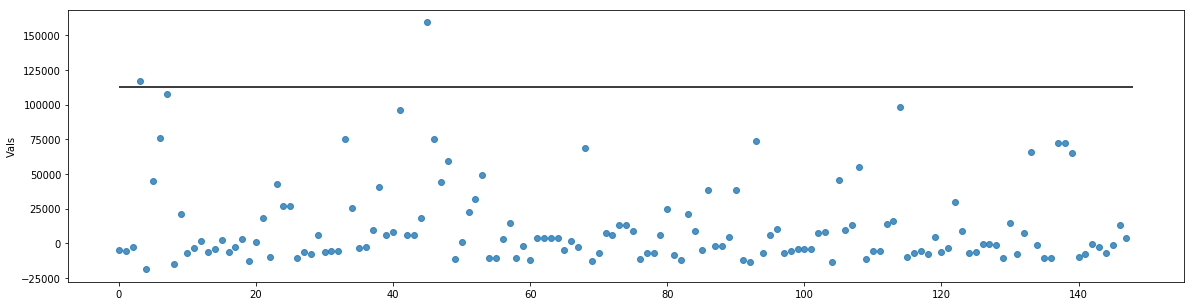

In [167]:
plt.figure(figsize=(20,5))
sns.regplot(x=np.array(np.arange(148)), y=new_frame['Vals'], scatter=True, 
            fit_reg=False)#, lowess=True)
plt.hlines(np.percentile(new_frame['Vals'], 99), xmin=0, xmax=148)
plt.show()

In [145]:
np.array(np.arange(148))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147])

## Problem to optimize:

It seems that the idea behind the algorithm can work. However there is the main problem of computation efficiency

### Slow on computing the coefficient

1. Use RandomizedSearchCV on a distribution

2. Look for regular SVR

3. You can try and SGDRegressor

In [6]:
# Randomized search CV params
from scipy import stats


reciprocal_distrib = stats.reciprocal(0.001, 0.1)
samples = reciprocal_distrib.rvs(10000, random_state=42)
print(min(samples), max(samples))
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()



0.00100005358146 0.099870068228


In [26]:
# main function
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import resample
from sklearn.datasets import make_regression
from sklearn.svm import LinearSVR
from scipy import stats

def optimize_weights(X, y, cv):
    param = {'C':np.logspace(-5, 4, 10)}#stats.reciprocal(0.001, 0.1)}
    svr = LinearSVR(random_state=42)
    model = RandomizedSearchCV(svr, param_distributions = param,
                         scoring='neg_mean_squared_error', cv=10,
                              random_state=42)
    model.fit(X,y)
    return model.best_estimator_.coef_

def mlQTLs_analysis(X, y, n_estimators=1000,
                    max_samples = 0.8, cv = 10, random_state=42):
    '''main function that will call the other functions'''
    all_w = []
    for i in range(n_estimators):
        # loop over the number of estimators
        X_res, y_res = resample(X, y,
                                n_samples=int(np.ceil(X.shape[0]*max_samples)),
                                replace=True, random_state=i*random_state)
        w = optimize_weights(X_res, y_res, cv=cv)
        all_w.append(w)
    # now you will need to:
        #1) Calculate the stability score for each feature
        #2) Sum the scores
        #3) for optimization purpose I will return the full  coeff_array
    all_w = np.array(all_w)
    sum_w = np.sum(all_w, axis=0)
    bin_matrix = np.where(all_w>0, 1, 0)
    s_scores = np.sum(bin_matrix, axis=0)
    return all_w, s_scores

In [ ]:
weigths, scores = mlQTLs_analysis(X, y)

In [ ]:
mean_w= np.sum(weigths, axis=0)
new_frame = pd.DataFrame({'markers_ID': cross_numeric.columns, 'Vals' :mean_w*scores})
new_frame.head()

In [ ]:
new_frame[new_frame['Vals']>= np.percentile(new_frame['Vals'], 99)]

In [ ]:

plt.figure(figsize=(20,5))
sns.regplot(x=np.array(np.arange(148)), y=new_frame['Vals'], scatter=True, 
            fit_reg=False)#, lowess=True)
plt.hlines(np.percentile(new_frame['Vals'], 99), xmin=0, xmax=148)
plt.show()